In [3]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [3]:
#Load data
data = 

In [8]:
#create scaler
scaler = MinMaxScaler()
# scaler = MinMaxScaler(feature_range=(-1,1)) #define range
# scaler = StandardScaler() #standardization
# fit scaler on data
scaler.fit(data)
# apply transform
normalized = scaler.transform(data)
# inverse transform
inverse = scaler.inverse_transform(normalized)

Generating 10000 intensity functions...
Data generation finished in 102.48 s.


NameError: name 'obj' is not defined

In [9]:
import tensorflow_transform as tft
y_normalized = tft.scale_to_0_1(y)

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
import os

directory = os.getcwd()

X = np.load(directory + "/PodatkiK/intenziteta700noise0.npy")
Y = np.load(directory + "/PodatkiK/C_values.npy") / (300 * 1e-10)

In [38]:
X.shape, Y.shape

((10000, 400), (10000,))

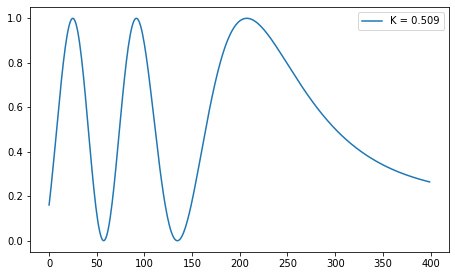

In [5]:
idx = 10
plt.figure(figsize=(7.5, 4.5))
plt.plot(X[idx, :], label='K = %0.3g' %Y[idx])
plt.legend()
plt.show()

In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

[]


In [21]:
model = Sequential() # naredimo model/ NN
# prva skrita plast: 400 nevronov, 400 izhodnih nevronov, normalna porazdelitev uteži
model.add(Dense(units=400, 
                activation='sigmoid', 
                input_shape=(400,), 
                kernel_initializer=initializers.RandomNormal(stddev=0.01)))

#dodamo še ostale skripte plasti
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))

#Zadnja plast je izhodna . ker iščemo skalr, vsebuje samo en neron
model.add(Dense(1, activation='sigmoid'))

#zgradimo nevronsko mrežo
# pri tem določimo vrsto otimizatorja, funkcijo izgube ter potencialne ostale mere uspešnosti
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# za trening nevronski mreži podamo vhodne in izhodne podatke
# določilo število epoh in velikost batchev
# za razdelitev na učni in validacijski set lahko uporabimo validation_split
#lahko tudi sami specificiramo validacijski set z validation_data
# shuffle: če zmeša trening podatke pred opoho
history = model.fit(X, Y, epochs=500, batch_size=300, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/500
30/30 - 0s - loss: 0.2170 - mean_squared_error: 0.0675 - val_loss: 0.1847 - val_mean_squared_error: 0.0547
Epoch 2/500
30/30 - 0s - loss: 0.1757 - mean_squared_error: 0.0523 - val_loss: 0.1683 - val_mean_squared_error: 0.0485
Epoch 3/500
30/30 - 0s - loss: 0.1668 - mean_squared_error: 0.0507 - val_loss: 0.1630 - val_mean_squared_error: 0.0475
Epoch 4/500
30/30 - 0s - loss: 0.1625 - mean_squared_error: 0.0502 - val_loss: 0.1583 - val_mean_squared_error: 0.0466
Epoch 5/500
30/30 - 0s - loss: 0.1577 - mean_squared_error: 0.0495 - val_loss: 0.1525 - val_mean_squared_error: 0.0452
Epoch 6/500
30/30 - 0s - loss: 0.1557 - mean_squared_error: 0.0494 - val_loss: 0.1460 - val_mean_squared_error: 0.0444
Epoch 7/500
30/30 - 0s - loss: 0.1460 - mean_squared_error: 0.0466 - val_loss: 0.1411 - val_mean_squared_error: 0.0436
Epoch 8/500
30/30 - 0s - loss: 0.1458 - mean_squared_error: 0.0466 - val_loss: 0.1430 - val_mean_squared_error: 0.0424
Epoch 9/500
30/30 - 0s - loss: 0.1429 - mean_squ

Epoch 70/500
30/30 - 0s - loss: 0.1072 - mean_squared_error: 0.0367 - val_loss: 0.0987 - val_mean_squared_error: 0.0316
Epoch 71/500
30/30 - 0s - loss: 0.1015 - mean_squared_error: 0.0357 - val_loss: 0.1091 - val_mean_squared_error: 0.0325
Epoch 72/500
30/30 - 0s - loss: 0.1014 - mean_squared_error: 0.0357 - val_loss: 0.0958 - val_mean_squared_error: 0.0315
Epoch 73/500
30/30 - 0s - loss: 0.1019 - mean_squared_error: 0.0356 - val_loss: 0.1019 - val_mean_squared_error: 0.0339
Epoch 74/500
30/30 - 0s - loss: 0.1070 - mean_squared_error: 0.0366 - val_loss: 0.0978 - val_mean_squared_error: 0.0331
Epoch 75/500
30/30 - 0s - loss: 0.1015 - mean_squared_error: 0.0356 - val_loss: 0.1082 - val_mean_squared_error: 0.0353
Epoch 76/500
30/30 - 0s - loss: 0.1064 - mean_squared_error: 0.0365 - val_loss: 0.0980 - val_mean_squared_error: 0.0328
Epoch 77/500
30/30 - 0s - loss: 0.1101 - mean_squared_error: 0.0373 - val_loss: 0.0970 - val_mean_squared_error: 0.0311
Epoch 78/500
30/30 - 0s - loss: 0.1019 -

Epoch 138/500
30/30 - 0s - loss: 0.0973 - mean_squared_error: 0.0343 - val_loss: 0.0901 - val_mean_squared_error: 0.0310
Epoch 139/500
30/30 - 0s - loss: 0.0936 - mean_squared_error: 0.0335 - val_loss: 0.0936 - val_mean_squared_error: 0.0322
Epoch 140/500
30/30 - 0s - loss: 0.0916 - mean_squared_error: 0.0334 - val_loss: 0.0885 - val_mean_squared_error: 0.0306
Epoch 141/500
30/30 - 0s - loss: 0.0888 - mean_squared_error: 0.0330 - val_loss: 0.0860 - val_mean_squared_error: 0.0288
Epoch 142/500
30/30 - 0s - loss: 0.0921 - mean_squared_error: 0.0334 - val_loss: 0.0959 - val_mean_squared_error: 0.0290
Epoch 143/500
30/30 - 0s - loss: 0.0950 - mean_squared_error: 0.0338 - val_loss: 0.0858 - val_mean_squared_error: 0.0296
Epoch 144/500
30/30 - 0s - loss: 0.0936 - mean_squared_error: 0.0335 - val_loss: 0.0962 - val_mean_squared_error: 0.0329
Epoch 145/500
30/30 - 0s - loss: 0.0967 - mean_squared_error: 0.0343 - val_loss: 0.0876 - val_mean_squared_error: 0.0287
Epoch 146/500
30/30 - 0s - loss:

Epoch 206/500
30/30 - 0s - loss: 0.0889 - mean_squared_error: 0.0321 - val_loss: 0.0996 - val_mean_squared_error: 0.0334
Epoch 207/500
30/30 - 0s - loss: 0.0903 - mean_squared_error: 0.0323 - val_loss: 0.0935 - val_mean_squared_error: 0.0281
Epoch 208/500
30/30 - 0s - loss: 0.0984 - mean_squared_error: 0.0343 - val_loss: 0.0811 - val_mean_squared_error: 0.0289
Epoch 209/500
30/30 - 0s - loss: 0.0869 - mean_squared_error: 0.0317 - val_loss: 0.0991 - val_mean_squared_error: 0.0333
Epoch 210/500
30/30 - 0s - loss: 0.0865 - mean_squared_error: 0.0319 - val_loss: 0.0799 - val_mean_squared_error: 0.0278
Epoch 211/500
30/30 - 0s - loss: 0.0823 - mean_squared_error: 0.0311 - val_loss: 0.0780 - val_mean_squared_error: 0.0279
Epoch 212/500
30/30 - 0s - loss: 0.0828 - mean_squared_error: 0.0312 - val_loss: 0.0805 - val_mean_squared_error: 0.0285
Epoch 213/500
30/30 - 0s - loss: 0.0930 - mean_squared_error: 0.0330 - val_loss: 0.0967 - val_mean_squared_error: 0.0331
Epoch 214/500
30/30 - 0s - loss:

Epoch 274/500
30/30 - 0s - loss: 0.0836 - mean_squared_error: 0.0307 - val_loss: 0.0841 - val_mean_squared_error: 0.0273
Epoch 275/500
30/30 - 0s - loss: 0.0802 - mean_squared_error: 0.0302 - val_loss: 0.0738 - val_mean_squared_error: 0.0268
Epoch 276/500
30/30 - 0s - loss: 0.0831 - mean_squared_error: 0.0308 - val_loss: 0.0785 - val_mean_squared_error: 0.0261
Epoch 277/500
30/30 - 0s - loss: 0.0808 - mean_squared_error: 0.0303 - val_loss: 0.0745 - val_mean_squared_error: 0.0264
Epoch 278/500
30/30 - 0s - loss: 0.0822 - mean_squared_error: 0.0307 - val_loss: 0.0763 - val_mean_squared_error: 0.0277
Epoch 279/500
30/30 - 0s - loss: 0.0839 - mean_squared_error: 0.0308 - val_loss: 0.0789 - val_mean_squared_error: 0.0278
Epoch 280/500
30/30 - 0s - loss: 0.0802 - mean_squared_error: 0.0302 - val_loss: 0.0755 - val_mean_squared_error: 0.0262
Epoch 281/500
30/30 - 0s - loss: 0.0778 - mean_squared_error: 0.0298 - val_loss: 0.0831 - val_mean_squared_error: 0.0260
Epoch 282/500
30/30 - 0s - loss:

Epoch 342/500
30/30 - 0s - loss: 0.0812 - mean_squared_error: 0.0298 - val_loss: 0.0709 - val_mean_squared_error: 0.0256
Epoch 343/500
30/30 - 0s - loss: 0.0760 - mean_squared_error: 0.0290 - val_loss: 0.0706 - val_mean_squared_error: 0.0256
Epoch 344/500
30/30 - 0s - loss: 0.0858 - mean_squared_error: 0.0311 - val_loss: 0.0948 - val_mean_squared_error: 0.0277
Epoch 345/500
30/30 - 0s - loss: 0.0820 - mean_squared_error: 0.0298 - val_loss: 0.0721 - val_mean_squared_error: 0.0259
Epoch 346/500
30/30 - 0s - loss: 0.0751 - mean_squared_error: 0.0290 - val_loss: 0.0713 - val_mean_squared_error: 0.0261
Epoch 347/500
30/30 - 0s - loss: 0.0795 - mean_squared_error: 0.0295 - val_loss: 0.0788 - val_mean_squared_error: 0.0278
Epoch 348/500
30/30 - 0s - loss: 0.0828 - mean_squared_error: 0.0302 - val_loss: 0.0725 - val_mean_squared_error: 0.0252
Epoch 349/500
30/30 - 0s - loss: 0.0776 - mean_squared_error: 0.0292 - val_loss: 0.0754 - val_mean_squared_error: 0.0251
Epoch 350/500
30/30 - 0s - loss:

Epoch 410/500
30/30 - 0s - loss: 0.0813 - mean_squared_error: 0.0297 - val_loss: 0.1071 - val_mean_squared_error: 0.0309
Epoch 411/500
30/30 - 0s - loss: 0.0809 - mean_squared_error: 0.0296 - val_loss: 0.0706 - val_mean_squared_error: 0.0246
Epoch 412/500
30/30 - 0s - loss: 0.0840 - mean_squared_error: 0.0300 - val_loss: 0.0832 - val_mean_squared_error: 0.0282
Epoch 413/500
30/30 - 0s - loss: 0.0754 - mean_squared_error: 0.0285 - val_loss: 0.0694 - val_mean_squared_error: 0.0248
Epoch 414/500
30/30 - 0s - loss: 0.0738 - mean_squared_error: 0.0283 - val_loss: 0.0710 - val_mean_squared_error: 0.0259
Epoch 415/500
30/30 - 0s - loss: 0.0778 - mean_squared_error: 0.0289 - val_loss: 0.0680 - val_mean_squared_error: 0.0248
Epoch 416/500
30/30 - 0s - loss: 0.0749 - mean_squared_error: 0.0286 - val_loss: 0.0709 - val_mean_squared_error: 0.0246
Epoch 417/500
30/30 - 0s - loss: 0.0793 - mean_squared_error: 0.0291 - val_loss: 0.0769 - val_mean_squared_error: 0.0245
Epoch 418/500
30/30 - 0s - loss:

Epoch 478/500
30/30 - 0s - loss: 0.0797 - mean_squared_error: 0.0290 - val_loss: 0.0793 - val_mean_squared_error: 0.0238
Epoch 479/500
30/30 - 0s - loss: 0.0786 - mean_squared_error: 0.0286 - val_loss: 0.0698 - val_mean_squared_error: 0.0240
Epoch 480/500
30/30 - 0s - loss: 0.0751 - mean_squared_error: 0.0278 - val_loss: 0.0684 - val_mean_squared_error: 0.0246
Epoch 481/500
30/30 - 0s - loss: 0.0738 - mean_squared_error: 0.0278 - val_loss: 0.0664 - val_mean_squared_error: 0.0245
Epoch 482/500
30/30 - 0s - loss: 0.0818 - mean_squared_error: 0.0294 - val_loss: 0.0760 - val_mean_squared_error: 0.0273
Epoch 483/500
30/30 - 0s - loss: 0.0766 - mean_squared_error: 0.0284 - val_loss: 0.0737 - val_mean_squared_error: 0.0242
Epoch 484/500
30/30 - 0s - loss: 0.0740 - mean_squared_error: 0.0279 - val_loss: 0.0748 - val_mean_squared_error: 0.0271
Epoch 485/500
30/30 - 0s - loss: 0.0760 - mean_squared_error: 0.0280 - val_loss: 0.0706 - val_mean_squared_error: 0.0244
Epoch 486/500
30/30 - 0s - loss:

In [14]:
#history.history.keys()
# Compute moving average
def moving_average(a, n=3) :
    
    idx = np.cumsum(np.arange(len(a)),dtype=float)
    idx[n:] = idx[n:] - idx[:-n]
    
    res = np.cumsum(a, dtype=float)
    res[n:] = res[n:] - res[:-n]
    
    return idx[n - 1:] / n, res[n - 1:] / n


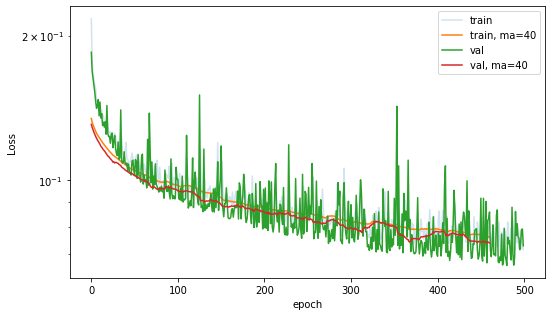

In [22]:


plt.figure(figsize=(7.5, 4.5))
plt.plot(history.history['loss'], label='train',alpha=0.2)
plt.plot(moving_average(history.history['loss'], 40)[1], label='train, ma=40')
plt.plot(history.history['val_loss'], label='val')
plt.plot(moving_average(history.history['val_loss'], 40)[1], label='val, ma=40')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

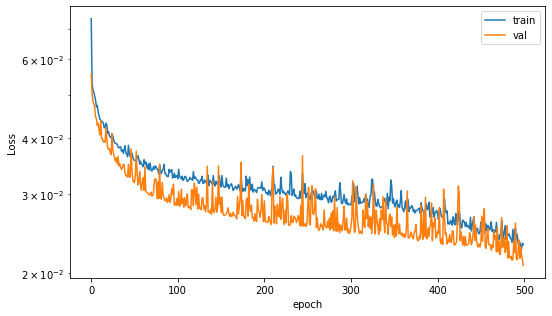

In [8]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='val')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

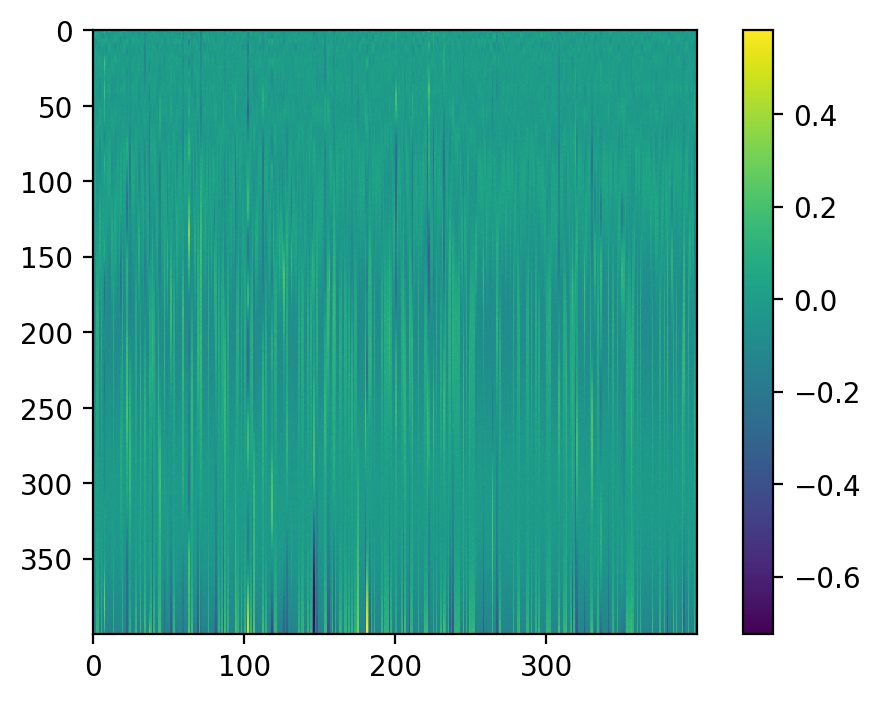

In [19]:
weights, biases = model.layers[0].get_weights()
fig = plt.figure(dpi=200)
img = plt.imshow(weights)
fig.colorbar(img)
plt.show()

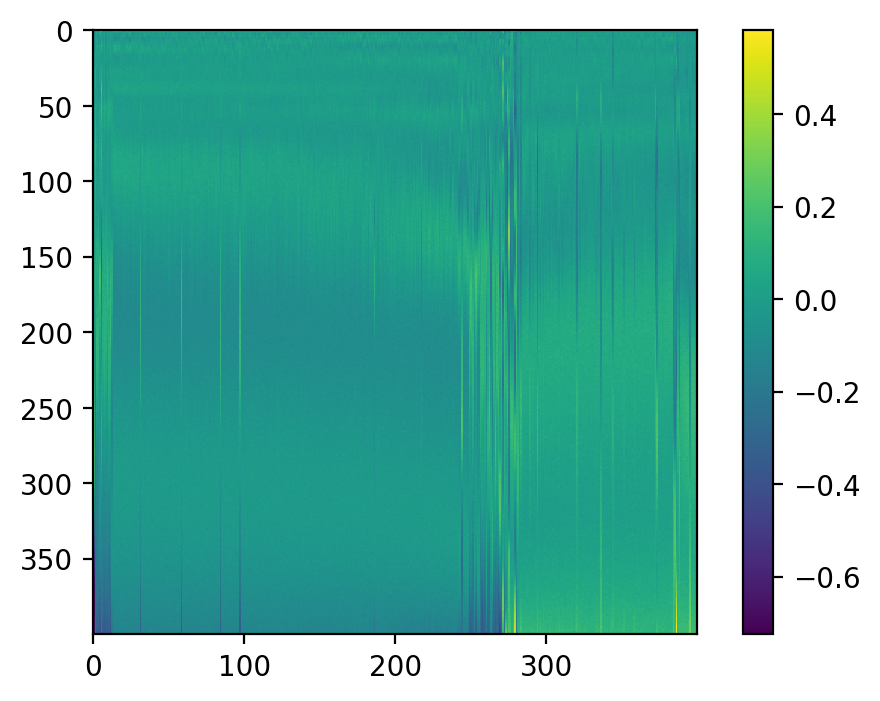

[146 319  39 267 156 222  81 238 148 258  86 155 351  60 207 321 176  10
  41 359 202 364  20 243 368  84 396 393  72 333 361 341  68 328 342 161
  11 343  23  82 170 256 109 285 248  35 392 115 271 226  21 172  92 275
 298 371 103 277  51 389 111 338  61  90  54 190 346  88  66  29 188 284
 185 218 259  62 340 382 314   9 322  26  79 165 209  77  50 213 292 366
  75  32   1 339  93 177 157 196 135 168 147 310  97 297 143 179 345 309
 274 262 286 294 101 272 216 307 255 162 289 374 323  16  64 130  27 399
 189 234  57 178 280 365 198 385 349 379 305 291 367 304 381 263  56 214
 257 113 223 228 141 203  46 324 127 254 327 335  58 129 237 352 208 137
 337   0 283 229 133 187 140 266 151  52 261 387  73 296 331 265  91   6
  45 149 110 279 132 306  80 192 152 388 122 363   8  15 377  36 270  99
  48  42 315 273 212  17 369 117 150 246 326 224 276 108 303 244  33 217
  14  25 376 260 397 373 119 201 124 299  12 231   4 116  55 107 348  78
  74 199 358 395 372 134 268  67 332 125 180 253  3

In [33]:
mean_val = np.max(weights, 0) # vzamemo povprecno vrednost vsakega stolpca
indices = np.argsort(np.dot(weights.T, np.arange(400))) # sortiramo utezi
fig = plt.figure(dpi=200)
img = plt.imshow(weights.T[indices].T)
fig.colorbar(img)
plt.show()

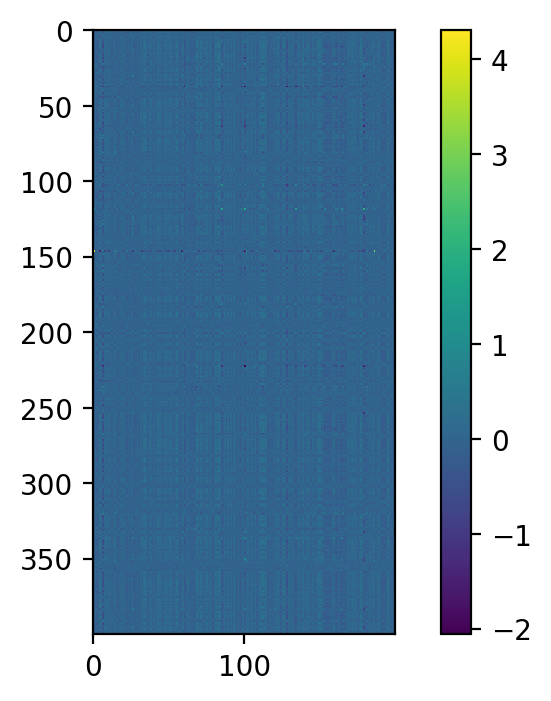

In [35]:
weights, biases = model.layers[1].get_weights()
#indices = np.argsort(np.dot(weights.T, np.arange(400))) # sortiramo utezi
fig = plt.figure(dpi=200)
img = plt.imshow(weights)
fig.colorbar(img)
plt.show()

In [10]:
model2 = Sequential() # naredimo model/ NN
# prva skrita plast: 400 nevronov, 400 izhodnih nevronov, normalna porazdelitev uteži
model2.add(Dense(units=400, 
                activation='sigmoid', 
                input_shape=(400,), 
                kernel_initializer=initializers.RandomNormal(stddev=0.01)))

#dodamo še ostale skripte plasti
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(50, activation='sigmoid'))
#Zadnja plast je izhodna . ker iščemo skalar, vsebuje samo en nevron
model2.add(Dense(1, activation='sigmoid'))

#zgradimo nevronsko mrežo
# pri tem določimo vrsto otimizatorja, funkcijo izgube ter potencialne ostale mere uspešnosti
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# za trening nevronski mreži podamo vhodne in izhodne podatke
# določilo število epoh in velikost batchev
# za razdelitev na učni in validacijski set lahko uporabimo validation_split
#lahko tudi sami specificiramo validacijski set z validation_data
# shuffle: če zmeša trening podatke pred opoho
history2 = model2.fit(X, Y, epochs=500, batch_size=300, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/500
30/30 - 0s - loss: 0.2230 - mean_squared_error: 0.0708 - val_loss: 0.1894 - val_mean_squared_error: 0.0529
Epoch 2/500
30/30 - 0s - loss: 0.1798 - mean_squared_error: 0.0525 - val_loss: 0.1722 - val_mean_squared_error: 0.0488
Epoch 3/500
30/30 - 0s - loss: 0.1687 - mean_squared_error: 0.0498 - val_loss: 0.1662 - val_mean_squared_error: 0.0481
Epoch 4/500
30/30 - 0s - loss: 0.1640 - mean_squared_error: 0.0496 - val_loss: 0.1600 - val_mean_squared_error: 0.0466
Epoch 5/500
30/30 - 0s - loss: 0.1597 - mean_squared_error: 0.0487 - val_loss: 0.1578 - val_mean_squared_error: 0.0469
Epoch 6/500
30/30 - 0s - loss: 0.1528 - mean_squared_error: 0.0471 - val_loss: 0.1475 - val_mean_squared_error: 0.0438
Epoch 7/500
30/30 - 0s - loss: 0.1467 - mean_squared_error: 0.0458 - val_loss: 0.1416 - val_mean_squared_error: 0.0432
Epoch 8/500
30/30 - 0s - loss: 0.1417 - mean_squared_error: 0.0447 - val_loss: 0.1363 - val_mean_squared_error: 0.0412
Epoch 9/500
30/30 - 0s - loss: 0.1395 - mean_squ

Epoch 70/500
30/30 - 0s - loss: 0.1047 - mean_squared_error: 0.0358 - val_loss: 0.0968 - val_mean_squared_error: 0.0327
Epoch 71/500
30/30 - 0s - loss: 0.0988 - mean_squared_error: 0.0348 - val_loss: 0.0948 - val_mean_squared_error: 0.0323
Epoch 72/500
30/30 - 0s - loss: 0.0994 - mean_squared_error: 0.0349 - val_loss: 0.0957 - val_mean_squared_error: 0.0319
Epoch 73/500
30/30 - 0s - loss: 0.0968 - mean_squared_error: 0.0345 - val_loss: 0.0927 - val_mean_squared_error: 0.0311
Epoch 74/500
30/30 - 0s - loss: 0.0967 - mean_squared_error: 0.0346 - val_loss: 0.0926 - val_mean_squared_error: 0.0313
Epoch 75/500
30/30 - 0s - loss: 0.0987 - mean_squared_error: 0.0348 - val_loss: 0.0954 - val_mean_squared_error: 0.0306
Epoch 76/500
30/30 - 0s - loss: 0.1000 - mean_squared_error: 0.0349 - val_loss: 0.0931 - val_mean_squared_error: 0.0306
Epoch 77/500
30/30 - 0s - loss: 0.0977 - mean_squared_error: 0.0346 - val_loss: 0.0992 - val_mean_squared_error: 0.0331
Epoch 78/500
30/30 - 0s - loss: 0.0961 -

Epoch 138/500
30/30 - 0s - loss: 0.0911 - mean_squared_error: 0.0331 - val_loss: 0.0831 - val_mean_squared_error: 0.0288
Epoch 139/500
30/30 - 0s - loss: 0.0890 - mean_squared_error: 0.0328 - val_loss: 0.0904 - val_mean_squared_error: 0.0283
Epoch 140/500
30/30 - 0s - loss: 0.0899 - mean_squared_error: 0.0328 - val_loss: 0.0834 - val_mean_squared_error: 0.0284
Epoch 141/500
30/30 - 0s - loss: 0.0908 - mean_squared_error: 0.0330 - val_loss: 0.0896 - val_mean_squared_error: 0.0282
Epoch 142/500
30/30 - 0s - loss: 0.0907 - mean_squared_error: 0.0330 - val_loss: 0.0834 - val_mean_squared_error: 0.0283
Epoch 143/500
30/30 - 0s - loss: 0.0941 - mean_squared_error: 0.0337 - val_loss: 0.0900 - val_mean_squared_error: 0.0284
Epoch 144/500
30/30 - 0s - loss: 0.0938 - mean_squared_error: 0.0333 - val_loss: 0.0890 - val_mean_squared_error: 0.0281
Epoch 145/500
30/30 - 0s - loss: 0.0935 - mean_squared_error: 0.0334 - val_loss: 0.0989 - val_mean_squared_error: 0.0287
Epoch 146/500
30/30 - 0s - loss:

Epoch 206/500
30/30 - 0s - loss: 0.0822 - mean_squared_error: 0.0307 - val_loss: 0.0801 - val_mean_squared_error: 0.0267
Epoch 207/500
30/30 - 0s - loss: 0.0901 - mean_squared_error: 0.0323 - val_loss: 0.0789 - val_mean_squared_error: 0.0269
Epoch 208/500
30/30 - 0s - loss: 0.0823 - mean_squared_error: 0.0308 - val_loss: 0.0771 - val_mean_squared_error: 0.0275
Epoch 209/500
30/30 - 0s - loss: 0.0913 - mean_squared_error: 0.0325 - val_loss: 0.0805 - val_mean_squared_error: 0.0284
Epoch 210/500
30/30 - 0s - loss: 0.0816 - mean_squared_error: 0.0306 - val_loss: 0.0795 - val_mean_squared_error: 0.0282
Epoch 211/500
30/30 - 0s - loss: 0.0820 - mean_squared_error: 0.0306 - val_loss: 0.0808 - val_mean_squared_error: 0.0288
Epoch 212/500
30/30 - 0s - loss: 0.0816 - mean_squared_error: 0.0306 - val_loss: 0.0766 - val_mean_squared_error: 0.0277
Epoch 213/500
30/30 - 0s - loss: 0.0834 - mean_squared_error: 0.0310 - val_loss: 0.0770 - val_mean_squared_error: 0.0268
Epoch 214/500
30/30 - 0s - loss:

Epoch 274/500
30/30 - 0s - loss: 0.0783 - mean_squared_error: 0.0295 - val_loss: 0.0884 - val_mean_squared_error: 0.0300
Epoch 275/500
30/30 - 0s - loss: 0.0813 - mean_squared_error: 0.0301 - val_loss: 0.0803 - val_mean_squared_error: 0.0257
Epoch 276/500
30/30 - 0s - loss: 0.0792 - mean_squared_error: 0.0295 - val_loss: 0.0757 - val_mean_squared_error: 0.0256
Epoch 277/500
30/30 - 0s - loss: 0.0792 - mean_squared_error: 0.0296 - val_loss: 0.0740 - val_mean_squared_error: 0.0257
Epoch 278/500
30/30 - 0s - loss: 0.0791 - mean_squared_error: 0.0295 - val_loss: 0.0724 - val_mean_squared_error: 0.0257
Epoch 279/500
30/30 - 0s - loss: 0.0841 - mean_squared_error: 0.0304 - val_loss: 0.0737 - val_mean_squared_error: 0.0267
Epoch 280/500
30/30 - 0s - loss: 0.0777 - mean_squared_error: 0.0294 - val_loss: 0.0732 - val_mean_squared_error: 0.0255
Epoch 281/500
30/30 - 0s - loss: 0.0776 - mean_squared_error: 0.0293 - val_loss: 0.0725 - val_mean_squared_error: 0.0256
Epoch 282/500
30/30 - 0s - loss:

Epoch 342/500
30/30 - 0s - loss: 0.0740 - mean_squared_error: 0.0282 - val_loss: 0.0699 - val_mean_squared_error: 0.0254
Epoch 343/500
30/30 - 0s - loss: 0.0778 - mean_squared_error: 0.0290 - val_loss: 0.0881 - val_mean_squared_error: 0.0260
Epoch 344/500
30/30 - 0s - loss: 0.0794 - mean_squared_error: 0.0289 - val_loss: 0.0701 - val_mean_squared_error: 0.0246
Epoch 345/500
30/30 - 0s - loss: 0.0776 - mean_squared_error: 0.0287 - val_loss: 0.0705 - val_mean_squared_error: 0.0255
Epoch 346/500
30/30 - 0s - loss: 0.0744 - mean_squared_error: 0.0283 - val_loss: 0.0760 - val_mean_squared_error: 0.0269
Epoch 347/500
30/30 - 0s - loss: 0.0796 - mean_squared_error: 0.0291 - val_loss: 0.0703 - val_mean_squared_error: 0.0251
Epoch 348/500
30/30 - 0s - loss: 0.0732 - mean_squared_error: 0.0280 - val_loss: 0.0725 - val_mean_squared_error: 0.0260
Epoch 349/500
30/30 - 0s - loss: 0.0729 - mean_squared_error: 0.0280 - val_loss: 0.0743 - val_mean_squared_error: 0.0249
Epoch 350/500
30/30 - 0s - loss:

Epoch 410/500
30/30 - 0s - loss: 0.0741 - mean_squared_error: 0.0275 - val_loss: 0.0695 - val_mean_squared_error: 0.0247
Epoch 411/500
30/30 - 0s - loss: 0.0745 - mean_squared_error: 0.0276 - val_loss: 0.0722 - val_mean_squared_error: 0.0257
Epoch 412/500
30/30 - 0s - loss: 0.0739 - mean_squared_error: 0.0274 - val_loss: 0.0705 - val_mean_squared_error: 0.0250
Epoch 413/500
30/30 - 0s - loss: 0.0917 - mean_squared_error: 0.0321 - val_loss: 0.0841 - val_mean_squared_error: 0.0280
Epoch 414/500
30/30 - 0s - loss: 0.0737 - mean_squared_error: 0.0274 - val_loss: 0.0798 - val_mean_squared_error: 0.0268
Epoch 415/500
30/30 - 0s - loss: 0.0802 - mean_squared_error: 0.0287 - val_loss: 0.1018 - val_mean_squared_error: 0.0343
Epoch 416/500
30/30 - 0s - loss: 0.0756 - mean_squared_error: 0.0278 - val_loss: 0.0691 - val_mean_squared_error: 0.0244
Epoch 417/500
30/30 - 0s - loss: 0.0780 - mean_squared_error: 0.0283 - val_loss: 0.0761 - val_mean_squared_error: 0.0231
Epoch 418/500
30/30 - 0s - loss:

Epoch 478/500
30/30 - 0s - loss: 0.0673 - mean_squared_error: 0.0251 - val_loss: 0.0644 - val_mean_squared_error: 0.0227
Epoch 479/500
30/30 - 0s - loss: 0.0643 - mean_squared_error: 0.0247 - val_loss: 0.0622 - val_mean_squared_error: 0.0222
Epoch 480/500
30/30 - 0s - loss: 0.0673 - mean_squared_error: 0.0250 - val_loss: 0.0687 - val_mean_squared_error: 0.0222
Epoch 481/500
30/30 - 0s - loss: 0.0653 - mean_squared_error: 0.0248 - val_loss: 0.0632 - val_mean_squared_error: 0.0222
Epoch 482/500
30/30 - 0s - loss: 0.0724 - mean_squared_error: 0.0261 - val_loss: 0.0655 - val_mean_squared_error: 0.0219
Epoch 483/500
30/30 - 0s - loss: 0.0755 - mean_squared_error: 0.0268 - val_loss: 0.0795 - val_mean_squared_error: 0.0273
Epoch 484/500
30/30 - 0s - loss: 0.0705 - mean_squared_error: 0.0259 - val_loss: 0.0700 - val_mean_squared_error: 0.0220
Epoch 485/500
30/30 - 0s - loss: 0.0741 - mean_squared_error: 0.0262 - val_loss: 0.0692 - val_mean_squared_error: 0.0222
Epoch 486/500
30/30 - 0s - loss:

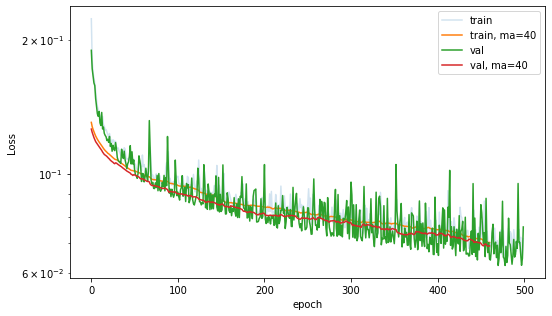

In [15]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history2.history['loss'], label='train',alpha=0.2)
plt.plot(moving_average(history2.history['loss'], 40)[1], label='train, ma=40')
plt.plot(history2.history['val_loss'], label='val')
plt.plot(moving_average(history2.history['val_loss'], 40)[1], label='val, ma=40')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

In [7]:
obj = GenerateData()
obj.generate(5000)

Generating 5000 intensity functions...
Data generation finished in 40.77 s.


In [8]:
X_test = obj.all_intensities[0]
Y_test = obj.all_cs

In [23]:
X_predict2 = model2.predict(X_test) * 300
X_predict = model.predict(X_test) * 300

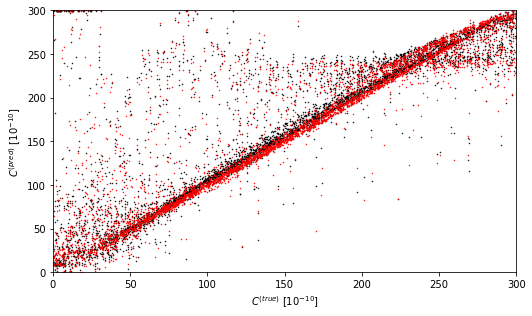

In [24]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(Y_test * 1e10, X_predict2, 'k.', markersize=1)
plt.plot(Y_test * 1e10, X_predict, 'r.', markersize=1)
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.xlabel('$C^{(true)}$ $[10^{-10}]$')
plt.ylabel('$C^{(pred)}$ $[10^{-10}]$')
plt.tight_layout()
plt.show()

In [25]:
# Evaluate the model on the test data using `evaluate`
print("Model: Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=300)
print("test loss, test acc:", results)

print("Model 2: Evaluate on test data")
results2 = model2.evaluate(X_test, Y_test, batch_size=300)
print("test loss, test acc:", results2)

Model: Evaluate on test data
17/17 [==============================] - 0s 4ms/step - loss: 0.5453 - mean_squared_error: 0.3720
test loss, test acc: [0.5453218221664429, 0.37199652194976807]
Model 2: Evaluate on test data
17/17 [==============================] - 0s 4ms/step - loss: 0.5501 - mean_squared_error: 0.3793
test loss, test acc: [0.5501293540000916, 0.37934133410453796]
